In [1]:
import numpy as np
import cv2
import math

img1 = cv2.imread(r"D:\collage\eksutram\2nd_work\all_num.jpeg",1)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray,5)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE,  np.ones((3, 3)))
mask2 = cv2.adaptiveThreshold(closing,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

dilation = cv2.dilate(mask2, np.ones((3, 3)), iterations=1)
# cv2.imshow("dilation1",dilation)
erosion = cv2.erode(dilation, np.ones((5, 5)), iterations=6)
# cv2.imshow("erosion1",erosion)
dilation = cv2.dilate(erosion, np.ones((3, 3)), iterations=10)
# cv2.imshow("dilation2",dilation)
erosion = cv2.erode(dilation, np.ones((5, 5)), iterations=1)
# cv2.imshow("erosion3",erosion)
# dilation = cv2.dilate(erosion, np.ones((3, 3)), iterations=7)
# erosion = cv2.erode(dilation, np.ones((3, 3)), iterations=5)
contours, hierarchy = cv2.findContours( erosion.copy(),  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# backtorgb = cv2.cvtColor(erosion,cv2.COLOR_GRAY2RGB)
# filtered = cv2.GaussianBlur(erosion, (3, 3), 0)
# retr,mask4= cv2.threshold(erosion,0,255,1)
# cv2.imshow("mask4",mask4)
a=1
while len(contours)>a:
    cnt = contours[a]
    area = cv2.contourArea(cnt)
    
    if cv2.contourArea(cnt)>110:
        x1, y1, w1, h1 = cv2.boundingRect(contours[a])
        print(x1, y1, w1, h1,cv2.contourArea(cnt))
#         backtorgb = cv2.cvtColor(erosion,cv2.COLOR_GRAY2RGB)
        cv2.rectangle(img1, (x1, y1), (x1+h1, y1+h1), (0, 255, 255), 2)
        cv2.rectangle(img1, (x1, y1), (x1+h1, (y1+h1//2)), (0, 0, 255), 2)
        
        cv2.imshow("img",img1)
        cv2.imshow("img1",erosion)
        cv2.waitKey(0)
#         cv2.rectangle(img1, (x1+h1, y1+h1//2+1), (x1, y1), (0, 0, 255), 3)

    a=a+1

    
    
# cv2.subtract(255, backtorgb)
# cv2.imshow("img",backtorgb)
# cv2.waitKey(0)
# cv2.imshow("opening",opening)

cv2.waitKey(0)
cv2.destroyAllWindows()

123 298 59 101 2522.0
259 297 61 99 1831.5
580 295 14 98 1074.0
534 295 12 32 319.0
712 294 57 98 1980.0
399 294 59 101 1778.5
748 124 14 94 1017.0
121 121 59 98 1735.0
393 118 60 101 1588.5
261 118 55 96 1637.5
531 115 56 99 1436.5


In [1]:
import numpy as np
import cv2
import math



    
    
def c_2(backtorgb,add,v2r,l_h2r,d2r,c_down2r,u_h2r,h1):
    v2=backtorgb[y1+h1//8+2:y1+h1,x1+add:x1+h1+add][0:2,0:5]
    l_h2=backtorgb[y1+h1//4-1:y1+h1,x1+add+h1//8+8:x1+h1+add][1:7,4:6]
    d2=backtorgb[y1+h1//8:y1+h1,x1+add+h1//8+8:x1+h1+add][4:6,4:6]
    u_h2=backtorgb[y1:y1+h1,x1+add+h1//8+10:x1+h1+add][0:6,3:6]
#             backtorgb[y1+h1//16:y1+h1,x1+add+h1//8+h1//16:x1+h1+add][0:2,3:5]=np.array([[255,255,0]])
#             backtorgb[y1+((3*h1)//16):y1+h1,x1+add+((3*h1)//16):x1+h1+add][0:2,3:5]=np.array([[255,255,0]])
    c_down2=backtorgb[y1+h1//4:y1+h1,x1+add:x1+h1+add][0:5,0:6]
    if (v2==np.array([[0,0,0]])).any():
        v2r=1
    if (l_h2==np.array([[0,0,0]])).any():
        l_h2r=1
    if (u_h2==np.array([[0,0,0]])).any():
        u_h2r=1  
    if (d2==np.array([[0,0,0]])).any():
        d2r=1
    if (c_down2==np.array([[0,0,0]])).any():
        c_down2r=1
    if v2r:
        if u_h2r:
            if l_h2r:
                print(9)
            else:
                print(7)

        elif l_h2r:
            print(8)
        else:
            print(6)
    elif d2r and u_h2r:
        print(5)
    elif d2r and c_down2r:
        print(3)
    elif d2r and (c_down2r==0):
        print(4)
    elif u_h2r:
        print(1)
    elif l_h2r:
        print(2)
    else:
        print(0)
    return
def c_u_h_2():
    return
def c_l_h_2():
    return
def d_2():
    return

img1 = cv2.imread(r"D:\collage\eksutram\2nd_work\all_num.jpeg",1)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray,5)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE,  np.ones((3, 3)))
mask2 = cv2.adaptiveThreshold(closing,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
dilation = cv2.dilate(mask2, np.ones((3, 3)), iterations=1)
# erosion = cv2.erode(dilation, np.ones((5, 5)), iterations=6)
# dilation = cv2.dilate(erosion, np.ones((3, 3)), iterations=10)
erosion = cv2.erode(dilation, np.ones((3, 3)), iterations=5)
# 
# ret,thresh1 = cv2.threshold(erosion,0,255,1)
# tophat = cv2.morphologyEx(closing, cv2.MORPH_TOPHAT, np.ones((2, 2)))
cv2.imshow("erosion",erosion)
cv2.waitKey(0)


contours, hierarchy = cv2.findContours( erosion.copy(),  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
backtorgb = cv2.cvtColor(erosion,cv2.COLOR_GRAY2RGB)
a=1
b=1
hmax=0


# while len(contours)>a:
#     cnt = contours[a]
#     area = cv2.contourArea(cnt)    
#     if cv2.contourArea(cnt)>110:
#         x1, y1, w1, h1 = cv2.boundingRect(contours[a])
        
#         if h1>hmax:
#             hmax=h1    
while len(contours)>=b:
    x1, y1, w1, h1 = cv2.boundingRect(contours[b])

    if h1>hmax:
        hmax=h1
    b=b+1
while len(contours)>a:
    cnt = contours[a]
    area = cv2.contourArea(cnt)
    add=0
    
    v2r=0
    l_h2r=0
    u_h2r=0
    d2r=0
    c_down2r=0
    
    if cv2.contourArea(cnt)>110:
        x1, y1, w1, h1 = cv2.boundingRect(contours[a])
        
#         if h1>hmax:
#             hmax=h1
   
#         print(x1, y1, w1, h1,cv2.contourArea(cnt))

        
        
        if(backtorgb[y1+h1//2-3:y1+h1//2+3,x1:x1+h1][0:6,3:9]==np.array([[0,0,0]])).any():
            add=-h1//2+2
#         elif(backtorgb[y1+h1//2-3:y1+h1//2+3,x1+h1//2:x1+h1][0:6,0:6]==np.array([[0,0,0]])).any():
#             print(2)
        
        
        if hmax//2<h1:
            result_img=backtorgb[y1:y1+h1,x1+add:x1+h1+add]
#             backtorgb[y1:y1+h1,x1+add:x1+h1+add][0:6,3:9]=np.array([[255,255,0]])
#             backtorgb[y1+h1//4:y1+h1,x1+add:x1+h1+add][0:6,3:9]=np.array([[255,255,0]])
            c_2(backtorgb,add,v2r,l_h2r,d2r,c_down2r,u_h2r,h1)
            
            
            
                
                    
                
#             backtorgb[y1+h1//2-3:y1+h1//2+3,x1:x1+h1][0:6,3:9]=np.array([[255,255,0]])
            cv2.rectangle(img1, (x1+add, y1), (x1+h1+add, y1+h1), (0, 255, 255), 2)
#             cv2.rectangle(erosion, (x1+add, y1), (x1+h1+add, y1+h1), (0, 255, 255), 2)
#             cv2.imshow("tophat",blackhat)
            cv2.imshow("img",img1)

            cv2.imshow("img1",result_img)

#         while
#         img1[y1:y1+h1,x1:x1+h1]
#         print(contours[a]) 
#         cv2.rectangle(img1, (x1, y1), (x1+h1, (y1+h1//2)), (0, 0, 255), 2)
#         erosion[x1:x1+10][y1:y1+10]=0
        
        

#         print(backtorgb[y1:y1+h1,x1:x1+h1])
        
        

#         print(img1[y1:y1+h1,x1:x1+h1])
#         print(img1)
        cv2.waitKey(0)
        
    a=a+1 

cv2.destroyAllWindows()
 


IndexError: list index out of range

In [16]:
cv2.imshow("img1",result_img)
result_img1= cv2.flip(backtorgb,0)
# cv2.imwrite('D:/eksutram/2nd_work/sample/result_img1.jpg', result_img1)
cv2.imshow("img2",result_img1)
result_img1= cv2.flip(backtorgb,1)
# cv2.imwrite('D:/eksutram/2nd_work/sample/result_img2.jpg', result_img1)
cv2.imshow("img3",result_img1)
result_img1= cv2.flip(backtorgb,-1)
# cv2.imwrite('D:/eksutram/2nd_work/sample/result_img3.jpg', result_img1)
cv2.imshow("img4",result_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

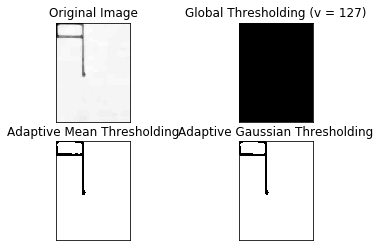

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



img = cv2.imread(r"D:\eksutram\2nd_work\sample\num.jpeg",0)


img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
# import cv2
# import numpy as np

# filename = erosion
# img = filename
# # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# # gray = np.float32(gray)
# dst = cv2.cornerHarris(filename,2,3,0.04)

# #result is dilated for marking the corners, not important
# dst = cv2.dilate(dst,None)

# # Threshold for an optimal value, it may vary depending on the image.
# img1[dst>0.01*dst.max()]=[0,0,255]

# cv2.imshow('dst',img1)
# # if cv2.waitKey(0) & 0xff == 27:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 175 but corresponding boolean dimension is 672

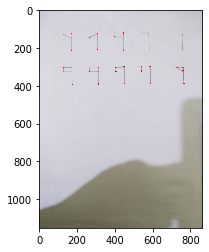

(<matplotlib.image.AxesImage at 0x1958b97f148>, None)

In [2]:
# import cv2
# import numpy as np

# # img = cv2.imread(r"D:\eksutram\2nd_work\sample\all_num.jpeg",1)
# # img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# # ret, thresh = cv2.threshold(img_gray, 127, 255,0)
# contours,hierarchy = cv2.findContours(erosion,2,1)
# cnt = contours[0]

# hull = cv2.convexHull(cnt,returnPoints = False)
# defects = cv2.convexityDefects(cnt,hull)

# for i in range(defects.shape[0]):
#     s,e,f,d = defects[i,0]
#     start = tuple(cnt[s][0])
#     end = tuple(cnt[e][0])
#     far = tuple(cnt[f][0])
#     cv2.line(img,start,end,[0,255,0],2)
#     cv2.circle(img,far,5,[0,0,255],-1)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

NameError: name 'erosion' is not defined

In [3]:
import numpy as np
import cv2
import math

img1 = cv2.imread(r"D:\eksutram\2nd_work\sample\all_num.jpeg",1)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray,5)

# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE,  np.ones((3, 3)))
mask2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret,thresh = cv2.threshold(mask2,0,255,1)
# erosion = cv2.erode(thresh, np.ones((3, 3)), iterations=1)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3,3)))
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3,3)))
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE,  np.ones((5, 5)))
erosion = cv2.erode(closing, np.ones((3, 3)), iterations=1)
dilation = cv2.dilate(erosion, np.ones((5, 5)), iterations=2)
gradient = cv2.morphologyEx(dilation, cv2.MORPH_GRADIENT, np.ones((3, 3)))
closing = cv2.morphologyEx(gradient, cv2.MORPH_CLOSE,  np.ones((5, 5)))
# closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE,  np.ones((5, 5)))
# opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, np.ones((3,3)))
# opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, np.ones((5,5)))
# # dilation = cv2.dilate(dilation, np.ones((3, 3)), iterations=1)
# erosion = cv2.erode(dilation, np.ones((5, 5)), iterations=1)
# 

# tophat = cv2.morphologyEx(dilation, cv2.MORPH_TOPHAT, np.ones((2, 2)))



# contours, hierarchy = cv2.findContours( erosion.copy(),  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# backtorgb = cv2.cvtColor(erosion,cv2.COLOR_GRAY2RGB)
# a=1
# hmax=0
# while len(contours)>a:
#     cnt = contours[a]
#     area = cv2.contourArea(cnt)
#     add=0
    
#     if cv2.contourArea(cnt)>110:
#         x1, y1, w1, h1 = cv2.boundingRect(contours[a])
        
#         if h1>hmax:
#             hmax=h1

# #         print(x1, y1, w1, h1,cv2.contourArea(cnt))

        
        
#         if(backtorgb[y1+h1//2-3:y1+h1//2+3,x1:x1+h1][0:6,5:10]==np.array([[0,0,0]])).any():
#             add=-h1//2+2
# #         elif(backtorgb[y1+h1//2-3:y1+h1//2+3,x1+h1//2:x1+h1][0:6,0:6]==np.array([[0,0,0]])).any():
# #             print(2)

#         if hmax//2<h1:
#             result_img=backtorgb[y1:y1+h1,x1+add:x1+h1+add]
#             cv2.rectangle(img1, (x1+add, y1), (x1+h1+add, y1+h1), (0, 255, 255), 2)
# #             cv2.rectangle(erosion, (x1+add, y1), (x1+h1+add, y1+h1), (0, 255, 255), 2)
# #             cv2.imshow("tophat",blackhat)
#             cv2.imshow("img",img1)

#             cv2.imshow("img1",result_img)

# #         while
# #         img1[y1:y1+h1,x1:x1+h1]
# #         print(contours[a]) 
# #         cv2.rectangle(img1, (x1, y1), (x1+h1, (y1+h1//2)), (0, 0, 255), 2)
# #         erosion[x1:x1+10][y1:y1+10]=0
        
        

# #         print(backtorgb[y1:y1+h1,x1:x1+h1])
        
        

# #         print(img1[y1:y1+h1,x1:x1+h1])
# #         print(img1)
#         cv2.waitKey(0)
        
#     a=a+1
# 
cv2.imshow("img1",closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [7]:
import numpy as np
import cv2
import math



    
    
def c_2(backtorgb,add,v2r,l_h2r,d2r,c_down2r,u_h2r,h1,y1,x1):
    m=0
    v2=backtorgb[y1+h1//8+2:y1+h1,x1+add:x1+h1+add][0:2,3:5]
    l_h2=backtorgb[y1+h1//4-1:y1+h1,x1+add+h1//8+8:x1+h1+add][5:7,4:6]
    d2=backtorgb[y1+h1//8:y1+h1,x1+add+h1//8+8:x1+h1+add][4:6,4:6]
    u_h2=backtorgb[y1:y1+h1,x1+add+h1//8+8:x1+h1+add][0:5,4:6]
#             backtorgb[y1+h1//16:y1+h1,x1+add+h1//8+h1//16:x1+h1+add][0:2,3:5]=np.array([[255,255,0]])
#             backtorgb[y1+((3*h1)//16):y1+h1,x1+add+((3*h1)//16):x1+h1+add][0:2,3:5]=np.array([[255,255,0]])
    c_down2=backtorgb[y1+h1//4:y1+h1,x1+add:x1+h1+add][0:5,4:6]
    if (v2==np.array([[0,0,0]])).any():
        v2r=1
    if (l_h2==np.array([[0,0,0]])).any():
        l_h2r=1
    if (u_h2==np.array([[0,0,0]])).any():
        u_h2r=1  
    if (d2==np.array([[0,0,0]])).any():
        d2r=1
    if (c_down2==np.array([[0,0,0]])).any():
        c_down2r=1
    if v2r:
        if u_h2r:
            if l_h2r:
                print(9)
                m=9
                
            else:
                print(7)
                m=7
                

        elif l_h2r:
            print(8)
            m=8
        else:
            print(6)
            m=6
    elif d2r and u_h2r:
        print(5)
        m=5
    elif d2r and c_down2r:
        print(3)
        m=3
    elif d2r and (c_down2r==0):
        print(4)
        m=4
    elif u_h2r:
        print(1)
        m=1
    elif l_h2r:
        print(2)
        m=2
    else:
        print(0)
    return m
# def c_u_h_2():
#     return
# def c_l_h_2():
#     return
# def d_2():
#     return
def find_number(img):
    erosion = img
# 
# ret,thresh1 = cv2.threshold(erosion,0,255,1)
# tophat = cv2.morphologyEx(closing, cv2.MORPH_TOPHAT, np.ones((2, 2)))
#     cv2.imshow("img",erosion)
#     cv2.waitKey(0)


    contours, hierarchy = cv2.findContours( erosion.copy(),  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    backtorgb = cv2.cvtColor(erosion,cv2.COLOR_GRAY2RGB)
    a=1
    bui=1
    hmax=0
    while len(contours)>bui:
        x1, y1, w1, h1 = cv2.boundingRect(contours[bui])
        if h1>hmax:
            hmax=h1        
        bui=bui+1
        
    while len(contours)>a:
        cnt = contours[a]
        area = cv2.contourArea(cnt)
        add=0

        v2r=0
        l_h2r=0
        u_h2r=0
        d2r=0
        c_down2r=0
        if cv2.contourArea(cnt)>110:
            x1, y1, w1, h1 = cv2.boundingRect(contours[a])



    #         print(x1, y1, w1, h1,cv2.contourArea(cnt))



            if(backtorgb[y1+h1//2-3:y1+h1//2+3,x1:x1+h1][0:6,3:9]==np.array([[0,0,0]])).any():
                add=-h1//2+2
    #         elif(backtorgb[y1+h1//2-3:y1+h1//2+3,x1+h1//2:x1+h1][0:6,0:6]==np.array([[0,0,0]])).any():
    #             print(2)


            if hmax//2<h1:
                result_img=backtorgb[y1:y1+h1,x1+add:x1+h1+add]
    #             backtorgb[y1:y1+h1,x1+add:x1+h1+add][0:6,3:9]=np.array([[255,255,0]])
    #             backtorgb[y1+h1//4:y1+h1,x1+add:x1+h1+add][0:6,3:9]=np.array([[255,255,0]])
                m=c_2(backtorgb,add,v2r,l_h2r,d2r,c_down2r,u_h2r,h1,y1,x1)






    #             backtorgb[y1+h1//2-3:y1+h1//2+3,x1:x1+h1][0:6,3:9]=np.array([[255,255,0]])
                cv2.rectangle(erosion, (x1+add, y1), (x1+h1+add, y1+h1), (0, 255, 255), 2)
    #             cv2.rectangle(erosion, (x1+add, y1), (x1+h1+add, y1+h1), (0, 255, 255), 2)
    #             cv2.imshow("tophat",blackhat)
                

                cv2.imshow("img1",result_img)

    #         while
    #         img1[y1:y1+h1,x1:x1+h1]
    #         print(contours[a]) 
    #         cv2.rectangle(img1, (x1, y1), (x1+h1, (y1+h1//2)), (0, 0, 255), 2)
    #         erosion[x1:x1+10][y1:y1+10]=0



    #         print(backtorgb[y1:y1+h1,x1:x1+h1])



    #         print(img1[y1:y1+h1,x1:x1+h1])
    #         print(img1)
        
            

        a=a+1
    cv2.waitKey(0)
    return m
img1 = cv2.imread(r"D:\collage\eksutram\2nd_work\sample\num_40.jpeg",1)
cv2.imshow("img1",img1)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray,5)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE,  np.ones((3, 3)))
# mask2 = cv2.adaptiveThreshold(closing,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
blur = cv2.GaussianBlur(closing,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
closing = cv2.morphologyEx(th3, cv2.MORPH_CLOSE,  np.ones((3, 3)))
dilation = cv2.dilate(closing, np.ones((3, 3)), iterations=1)
erosion = cv2.erode(dilation, np.ones((5, 5)), iterations=2)
img=erosion 

# mask2 = cv2.adaptiveThreshold(closing,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)




# dilation = cv2.dilate(erosion, np.ones((3, 3)), iterations=10)
# erosion = cv2.erode(dilation, np.ones((5, 5)), iterations=1)
# cv2.imshow("erosion",erosion)
i=-1

while i<=2:
    if i==2:
        print("10's place\t")
        t=find_number(img)
        
    else:
        if i==-1:
            print("100's place")
            h=find_number(cv2.flip(img,i))
        if i==0:
            print("1000's place")
            th=find_number(cv2.flip(img,i))
        if i==1:
            print("1's place")
            O=find_number(cv2.flip(img,i))
            
        

        
    
    i=i+1
s=10*t+100*h+1000*th+O
print("final number = ",s)
cv2.destroyAllWindows()
 


100's place
0
1000's place
0
1's place
0
10's place	
4
final number =  40
